In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import calendar

In [2]:
df_venu = pd.read_csv("/content/re_arrange.csv")
df_venu.head()

,date,Year_Value
0,1/1/2011,NaN
1,1/2/2011,NaN
2,1/3/2011,NaN
3,1/4/2011,NaN
4,1/5/2011,NaN


In [3]:
df_venu.isnull().sum()

date            0
Year_Value    137
dtype: int64

In [4]:
data=df_venu[59:]

In [5]:
data.isnull().sum()

date           0
Year_Value    78
dtype: int64

In [6]:
df=data.reset_index()

#df=data[['date','Year_Value']]

In [7]:
data=df[['date','Year_Value']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3594 non-null   object 
 1   Year_Value  3516 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.3+ KB


In [9]:
print(data.isnull().sum())

date           0
Year_Value    78
dtype: int64


In [10]:
# filling na values with previse and next value
data["Year_Value"]=data["Year_Value"].fillna((data["Year_Value"].fillna(method='bfill')+data["Year_Value"].fillna(method='ffill'))/2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
data.isnull().sum()

date          0
Year_Value    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3594 non-null   object 
 1   Year_Value  3594 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.3+ KB


In [13]:
data.dtypes

date           object
Year_Value    float64
dtype: object

In [14]:
data.head()

,date,Year_Value
0,3/1/2011,45.200
1,3/2/2011,44.846
2,3/3/2011,44.800
3,3/4/2011,44.900
4,3/5/2011,44.906


In [15]:
# changing the date formate
data['date'] = pd.to_datetime(data.date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3594 non-null   datetime64[ns]
 1   Year_Value  3594 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 56.3 KB


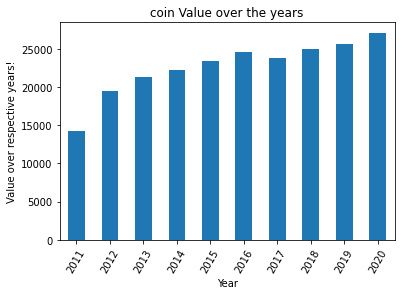

In [17]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Total'] = data['Year_Value']
grp_by_year = data.groupby('Year')['Total'].sum()
grp_by_year.plot(kind='bar');
plt.title('coin Value over the years')
plt.ylabel('Value over respective years!');
plt.xticks(rotation=60);

In [ ]:
average_coinvalue = data['Total'].sum()/len(data.index)
print('average_coinvalue over the years: {}'.format(average_coinvalue))

average_coinvalue over the years: 63.167110914023375


In [ ]:
years=data.Year.unique() 
months=sorted(data.Month.unique())
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
avg=[]
for i in years:
    l=data[data["Year"]==i].sum()
    print("the avg prices of ",i,"is   ",l["Year_Value"]/len(data[data["Year"]==i]))
    avg.append(l["Year_Value"]/len(data[data["Year"]==i]))

the avg prices of  2011 is    46.796799019607846
the avg prices of  2012 is    53.35978551912569
the avg prices of  2013 is    58.53338150684931
the avg prices of  2014 is    61.00487808219178
the avg prices of  2015 is    64.11646095890411
the avg prices of  2016 is    67.17585601092897
the avg prices of  2017 is    65.09728
the avg prices of  2018 is    68.39985
the avg prices of  2019 is    70.39844780821917
the avg prices of  2020 is    74.12806673497268


In [ ]:
avg_months=[]
for i in years:
    for j in months:
        k=data[data["Year"]== i]
        month=k[k["Month"] ==j].sum()
        month/len(k[k["Month"]==j])
        print(" the avg of",j,"rd month with respect ",i,"year",month['Year_Value']/len(k[k["Month"]==j]))
        avg_months.append(month['Year_Value']/len(k[k["Month"]==j]))

 the avg of 1 rd month with respect  2011 year nan
 the avg of 2 rd month with respect  2011 year nan
 the avg of 3 rd month with respect  2011 year 44.92319354838712
 the avg of 4 rd month with respect  2011 year 44.29526666666667
 the avg of 5 rd month with respect  2011 year 44.83490322580646
 the avg of 6 rd month with respect  2011 year 44.81853333333334
 the avg of 7 rd month with respect  2011 year 44.394612903225806
 the avg of 8 rd month with respect  2011 year 45.31879032258066
 the avg of 9 rd month with respect  2011 year 47.31590000000001
 the avg of 10 rd month with respect  2011 year 49.16920967741936
 the avg of 11 rd month with respect  2011 year 50.574833333333345
 the avg of 12 rd month with respect  2011 year 52.31685483870969
 the avg of 1 rd month with respect  2012 year 51.229354838709675
 the avg of 2 rd month with respect  2012 year 49.16646551724139
 the avg of 3 rd month with respect  2012 year 50.22832258064516
 the avg of 4 rd month with respect  2012 year 

In [ ]:
data["diff"]=data["Year_Value"]

In [ ]:
for i in range(1,len(data)):
    data["diff"][i]=data["Year_Value"][i]-data["Year_Value"][i-1]

In [ ]:
data["diff"][0]=0

In [ ]:
print("this is data where we hava max differ we got           \n\n\n",data[data["diff"] ==data["diff"].max()][["date","diff"]])

this is data where we hava max differ we got           


           date   diff
911 2013-08-28  2.815


In [ ]:
print("this is data where we hava negative   differ we got    \n\n\n",data[data["diff"] ==data["diff"].min()][["date","diff"]])

this is data where we hava negative   differ we got    


           date  diff
186 2011-09-03 -2.45


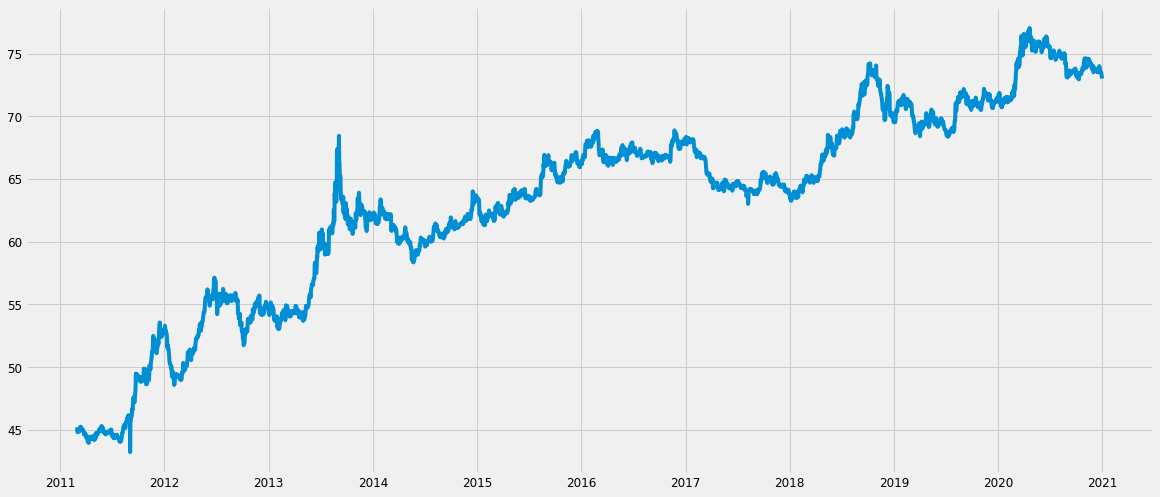

In [ ]:
plt.plot(data["date"],data["Year_Value"])

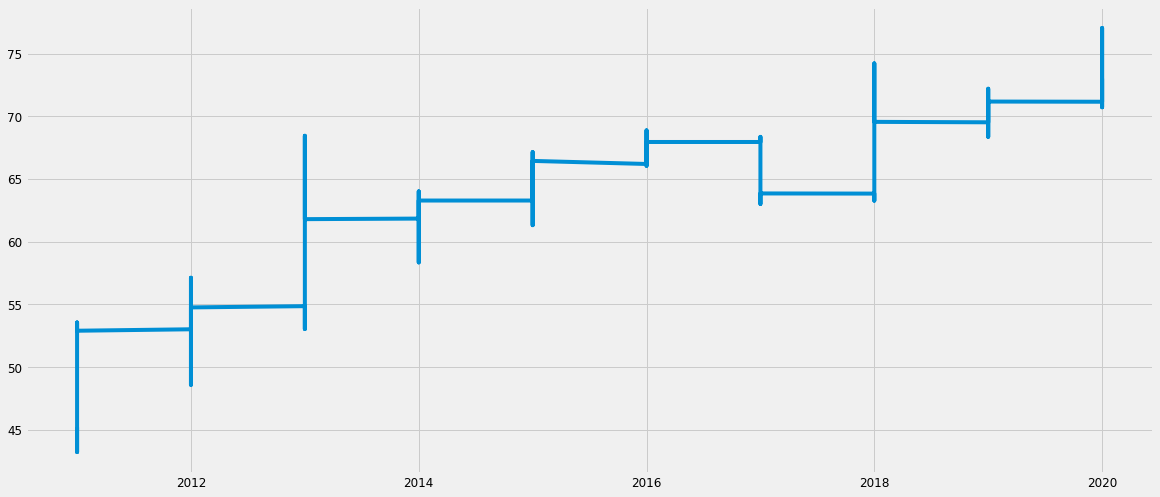

In [ ]:
plt.plot(data["Year"],data["Year_Value"])

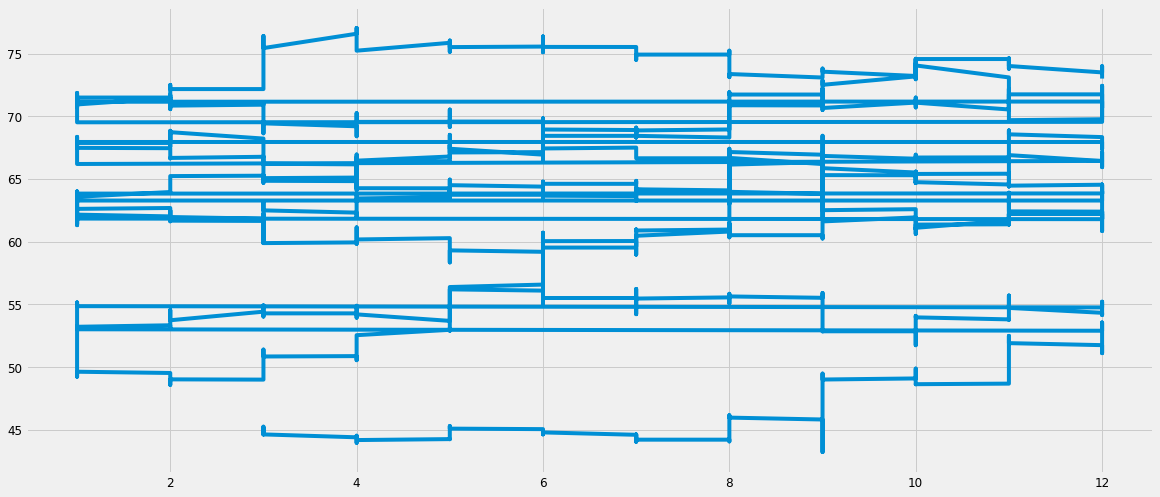

In [ ]:
plt.plot(data["Month"],data["Year_Value"])

In [ ]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)
indexed_X = data.set_index(['date'])
IX = data[["date","Year_Value"]]
IX.dtypes

date          datetime64[ns]
Year_Value           float64
dtype: object

In [ ]:
type(IX)

pandas.core.frame.DataFrame

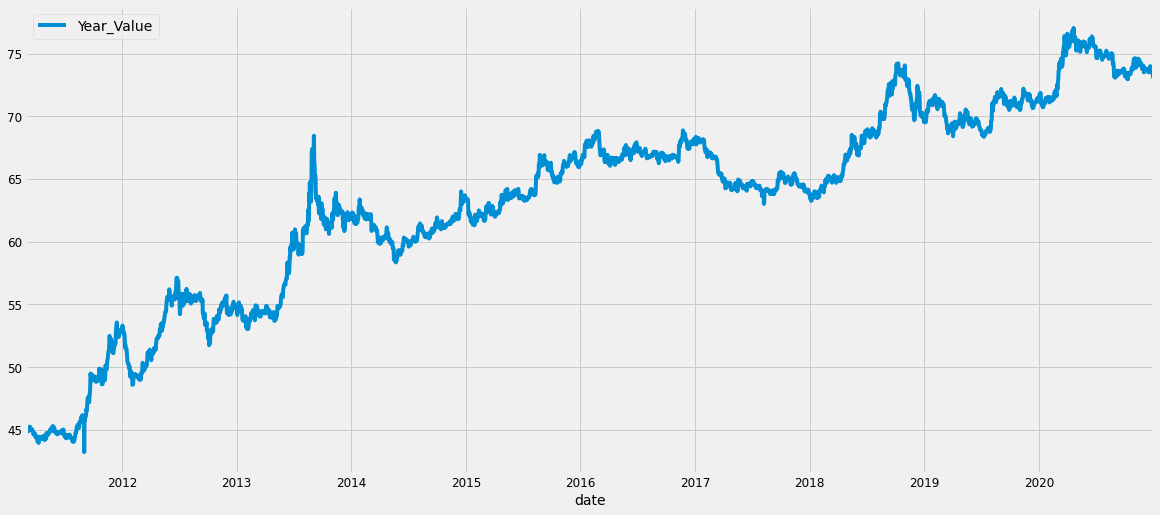

In [ ]:
IX.plot(x='date')
plt.show()

In [ ]:
#determining Rolling Statistics

rolmean = IX.rolling(window=52).mean()

rolstd = IX.rolling(window=52).std()
print(rolmean,"\n",rolstd)

      Year_Value
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
3589   73.921750
3590   73.912614
3591   73.900557
3592   73.885277
3593   73.865867

[3594 rows x 1 columns] 
       Year_Value
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
3589    0.315184
3590    0.320487
3591    0.329525
3592    0.343826
3593    0.363921

[3594 rows x 1 columns]


In [ ]:
#orig = plt.plot(IX, color='green', label='Original')
#mean = plt.plot(rolmean, color='red', label='Rolling mean')
#std = plt.plot(rolstd, color='blue', label='Rolling std')
#plt.legend(loc='best')
#plt.title("Rolling mean and Standard deviation")
#plt.show(block=False)

#perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller test:')
dftest = adfuller(IX['Year_Value'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
    
print(dfoutput)  

Results of Dickey-Fuller test:
Test_statistic                   -1.966214
p-value                           0.301581
#lags used                       17.000000
Number of observations used    3576.000000
critical value (1%)              -3.432180
critical value (5%)              -2.862349
critical value (10%)             -2.567200
dtype: float64


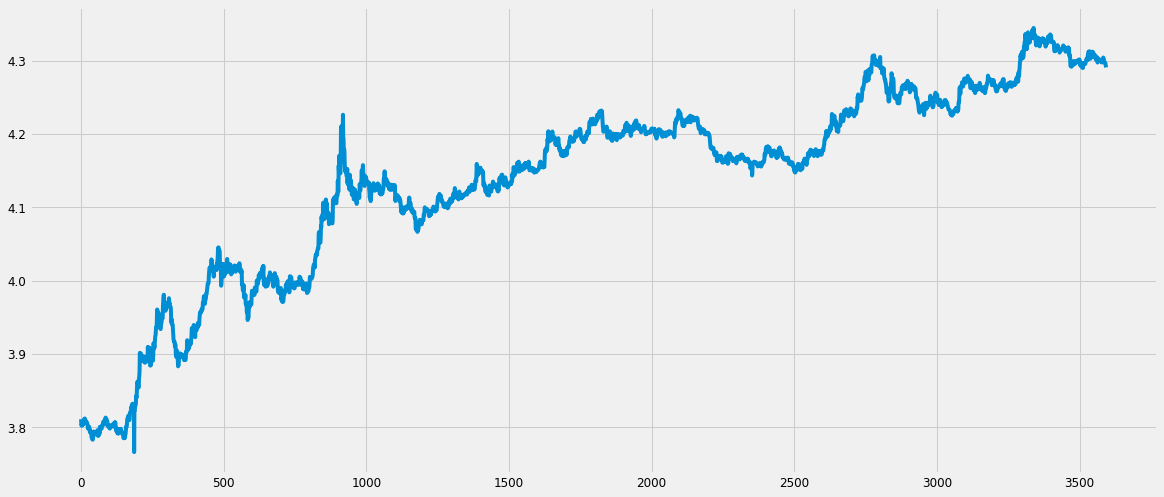

In [ ]:
#Estimating Trend after log function
import numpy as np

#IX = np.array(IX["Year_Value"], dtype=int)
IX_logscale = np.log(IX["Year_Value"])
plt.plot(IX_logscale)

In [ ]:
IX_logscale = IX_logscale.replace([np.inf, -np.inf], np.nan)
IX_logscale = IX_logscale.replace([np.inf, -np.inf], np.nan).dropna(how="all")
IX_logscale[:10]
IX_logscale.dtype

dtype('float64')

Text(0.5, 1.0, 'Applying log fuction to the data')

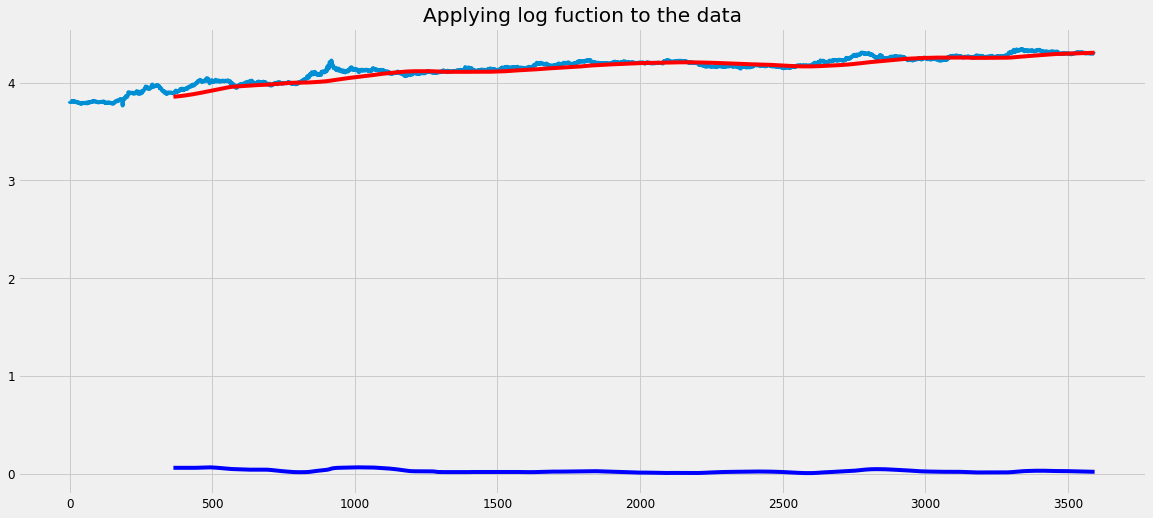

In [ ]:
movingAverage = IX_logscale.rolling(window=365).mean()
movingStd = IX_logscale.rolling(window=365).std()

plt.plot(IX_logscale)
plt.plot(movingAverage,color='red')
plt.plot(movingStd, color = 'blue')
plt.title('Applying log fuction to the data')

In [ ]:
datasetlogScaleminusmovingAverage = IX_logscale - movingAverage
datasetlogScaleminusmovingAverage

#removing Nan values
datasetlogScaleminusmovingAverage.dropna(inplace=True)
datasetlogScaleminusmovingAverage

364     0.038827
365     0.036261
366     0.035610
367     0.038311
368     0.046450
          ...   
3589   -0.007979
3590   -0.008199
3591   -0.010245
3592   -0.012608
3593   -0.015072
Name: Year_Value, Length: 3230, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=365).mean()
    movingStd = timeseries.rolling(window=365).std()
    
    #plotting rolling statistics
    org = plt.plot(timeseries, color='green', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingStd, color='blue', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & standard deviation')
    plt.show(block=False)
    
    #dickey-fuller test:
    print('Results of Dickey-fuller test:')
    #dftest = adfuller(timeseries["y"], autolag='AIC')
    
    #dfoutput = pd.Series(dftest[0:4], index=['Test_statistic','p-value','lags used','Number of observations used'])
    #for key,value in dftest[4].items():
     #   dfoutput['critical value (%s)'%key] = value
    #print(dfoutput)     

In [ ]:

datasetlogScaleminusmovingAverage.head()

364    0.038827
365    0.036261
366    0.035610
367    0.038311
368    0.046450
Name: Year_Value, dtype: float64

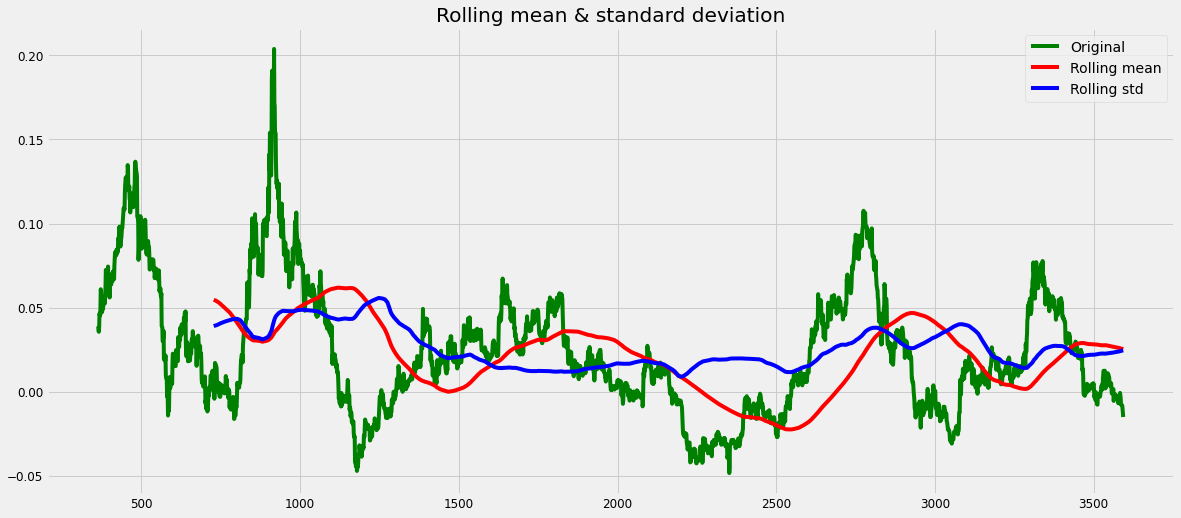

Results of Dickey-fuller test:


In [ ]:
test_stationarity(datasetlogScaleminusmovingAverage)

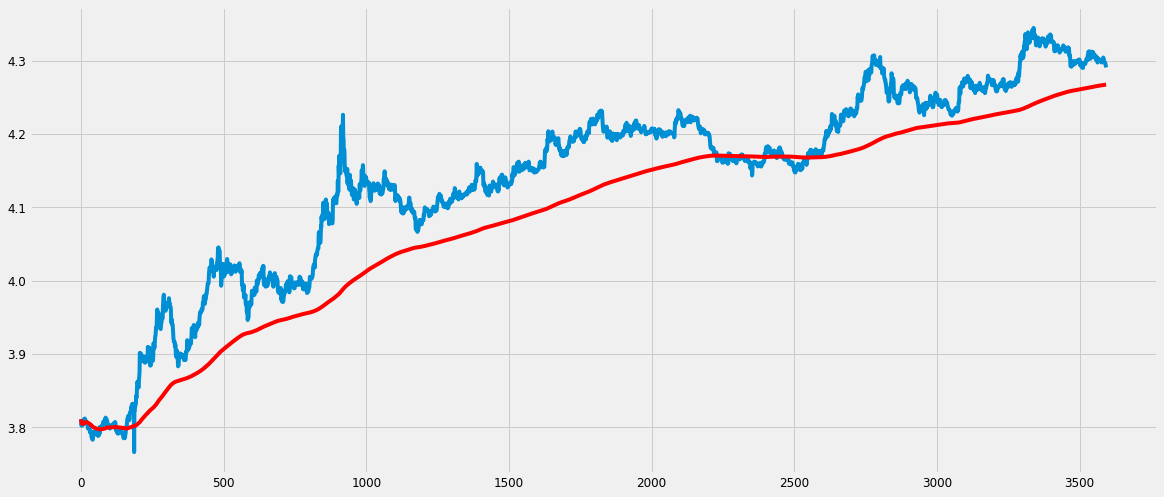

In [ ]:
exponentialDecayWeightedAverage = IX_logscale.ewm(halflife=365, min_periods=0, adjust=True).mean()
plt.plot(IX_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

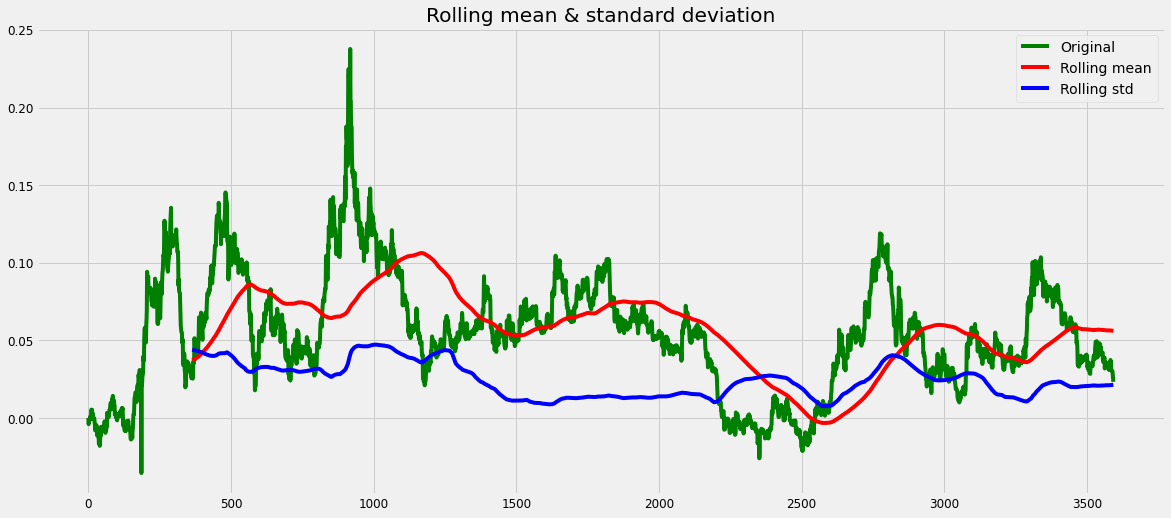

Results of Dickey-fuller test:


In [ ]:
datasetlogScaleminusmovingExponentialDecayAverage=IX_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleminusmovingExponentialDecayAverage)

Text(0.5, 1.0, 'Shifting the values by one place')

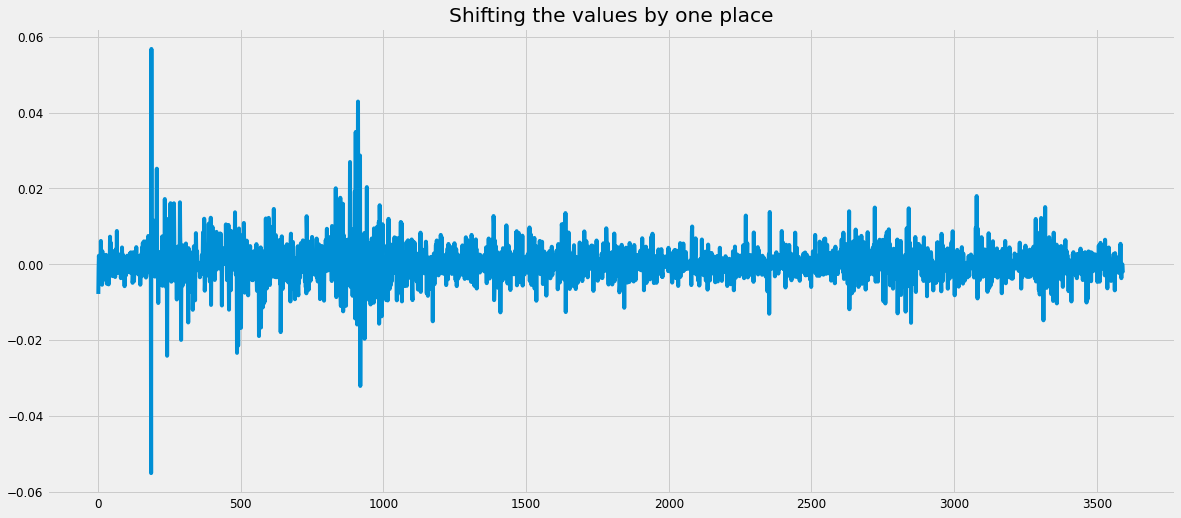

In [ ]:

datasetLogDiffShifting = IX_logscale - IX_logscale.shift()
plt.plot(datasetLogDiffShifting)
plt.title('Shifting the values by one place')

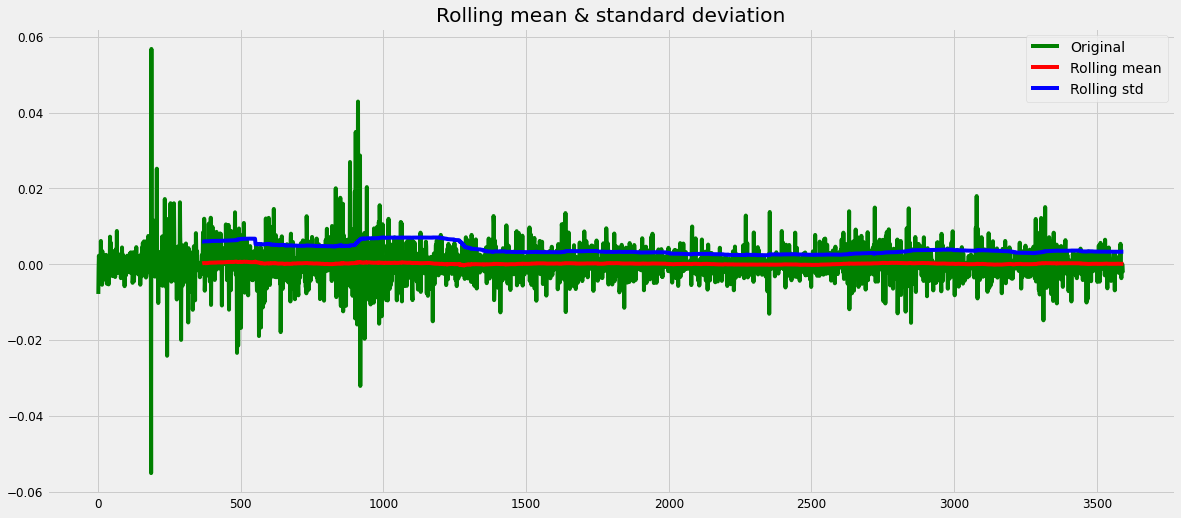

Results of Dickey-fuller test:


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

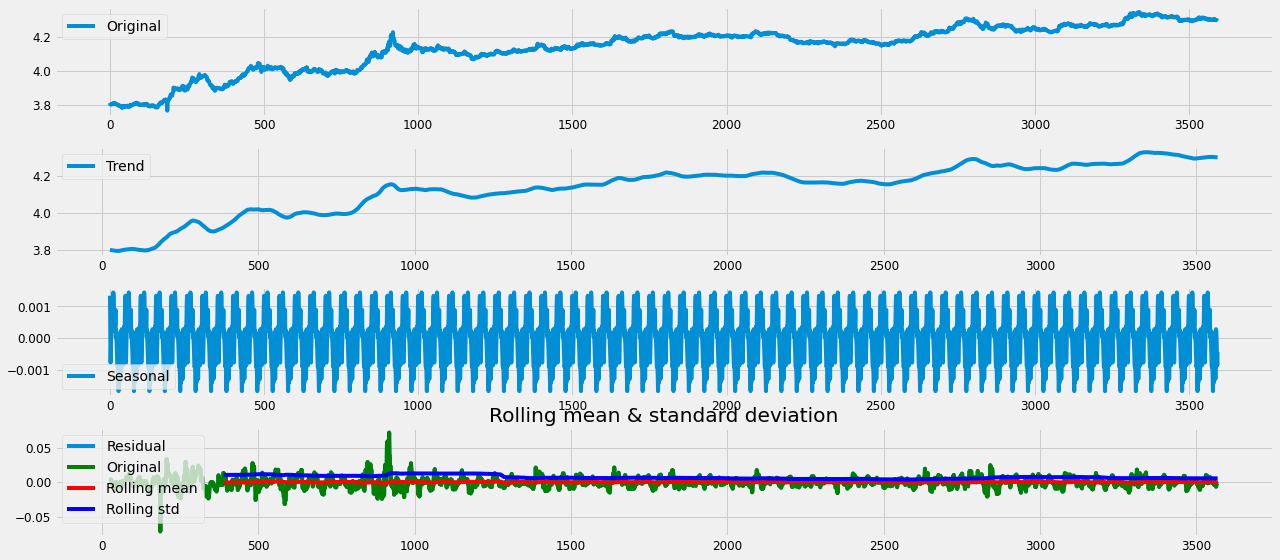

Results of Dickey-fuller test:


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IX_logscale, freq = 50)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(IX_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

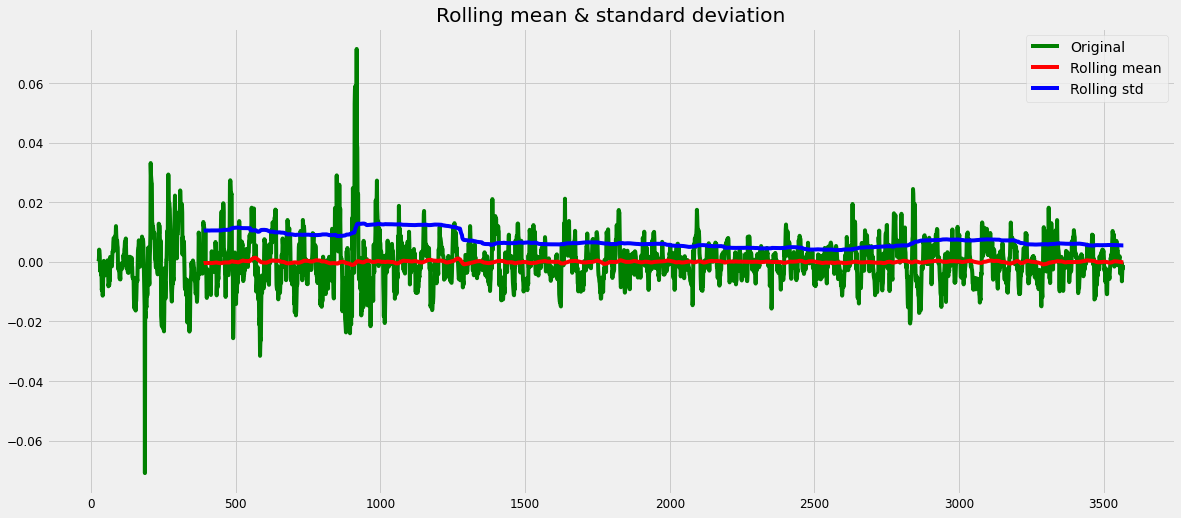

Results of Dickey-fuller test:


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [ ]:
data.rename(columns={'Year_Value': 'y', 'Date':'ds'}, inplace = True)
data.head().iloc[:,:2]

,date,y
0,2011-03-01,45.200
1,2011-03-02,44.846
2,2011-03-03,44.800
3,2011-03-04,44.900
4,2011-03-05,44.906


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
data.head()

,date,y
0,2011-03-01,45.200
1,2011-03-02,44.846
2,2011-03-03,44.800
3,2011-03-04,44.900
4,2011-03-05,44.906


In [ ]:
data1 = data.groupby('date')['y'].sum().reset_index()

In [ ]:
data1 = data1.set_index('date')
data1.index

DatetimeIndex(['2011-03-01', '2011-03-02', '2011-03-03', '2011-03-04',
               '2011-03-05', '2011-03-06', '2011-03-07', '2011-03-08',
               '2011-03-09', '2011-03-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=3594, freq=None)

In [ ]:
y = data1['y'].resample('MS').mean()

In [ ]:
y['2017':]

date
2017-01-01    68.067231
2017-02-01    66.968905
2017-03-01    65.873348
2017-04-01    64.541037
2017-05-01    64.425285
2017-06-01    64.445503
2017-07-01    64.443087
2017-08-01    63.926455
2017-09-01    64.432127
2017-10-01    65.081147
2017-11-01    64.859612
2017-12-01    64.216656
2018-01-01    63.640531
2018-02-01    64.448045
2018-03-01    65.047273
2018-04-01    65.683203
2018-05-01    67.524939
2018-06-01    67.786997
2018-07-01    68.663945
2018-08-01    69.553235
2018-09-01    72.095337
2018-10-01    73.587258
2018-11-01    71.786417
2018-12-01    70.719639
2019-01-01    70.648365
2019-02-01    71.201248
2019-03-01    69.581703
2019-04-01    69.403773
2019-05-01    69.767265
2019-06-01    69.419143
2019-07-01    68.746329
2019-08-01    71.127105
2019-09-01    71.304517
2019-10-01    71.001494
2019-11-01    71.486048
2019-12-01    71.172710
2020-01-01    71.264603
2020-02-01    71.583828
2020-03-01    74.534897
2020-04-01    76.228365
2020-05-01    75.688410
2020-06-01 

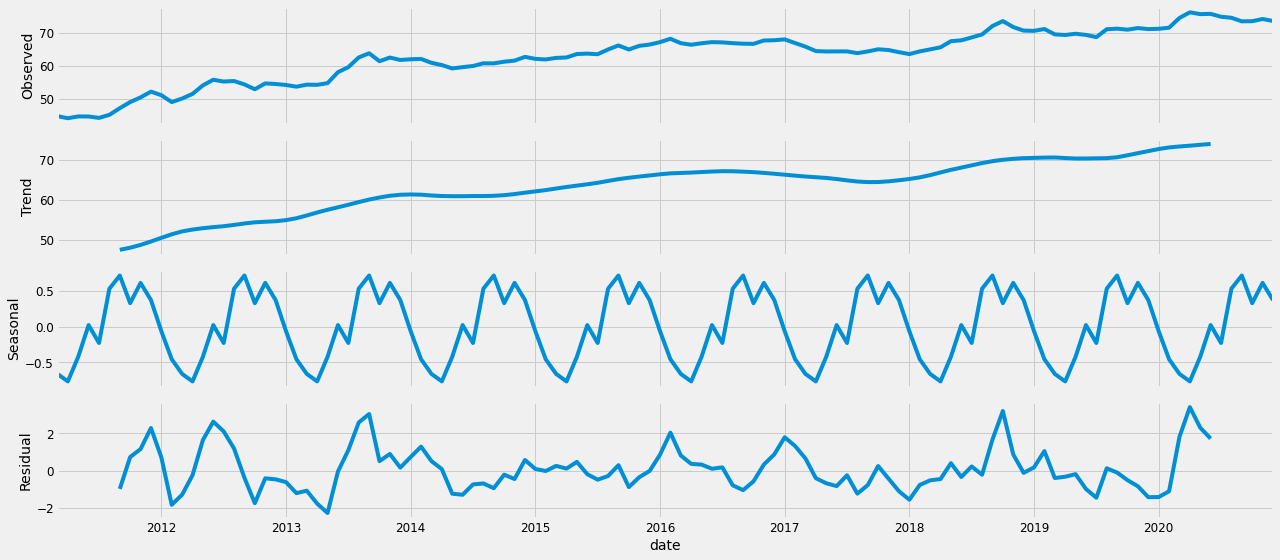

In [ ]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
          mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

IndentationError: ignored

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0443      0.405      0.109      0.913      -0.750       0.839
ma.L1          0.1848      0.412      0.448      0.654      -0.623       0.993
ar.S.L12      -0.4290      0.084     -5.107      0.000      -0.594      -0.264
sigma2         1.5492      0.245      6.315      0.000       1.068       2.030


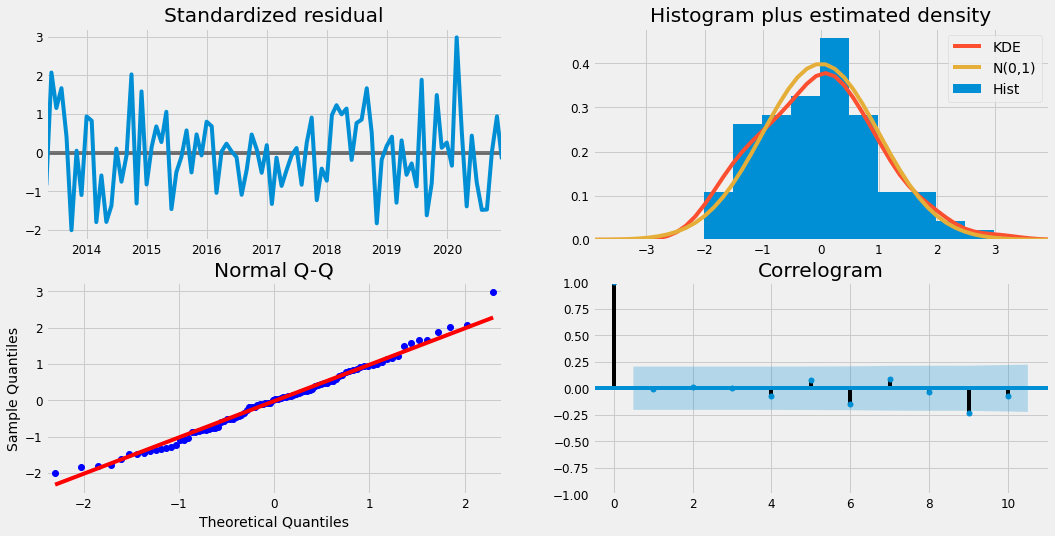

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


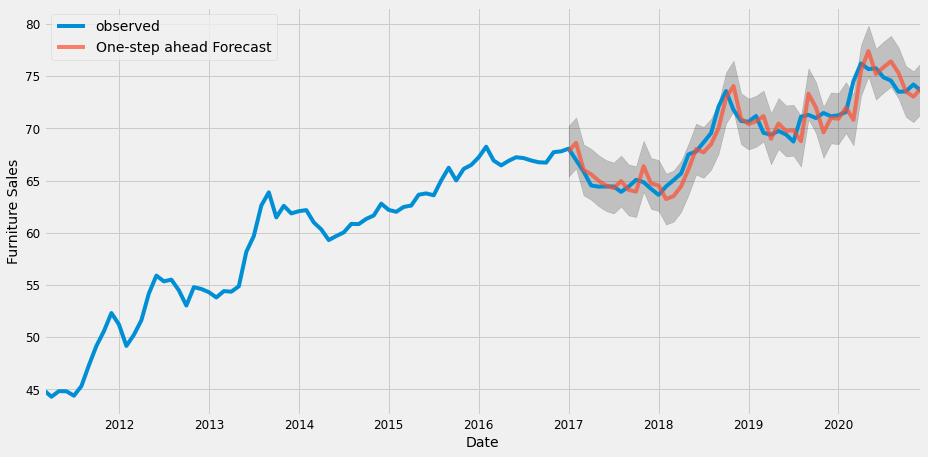

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.57


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.25


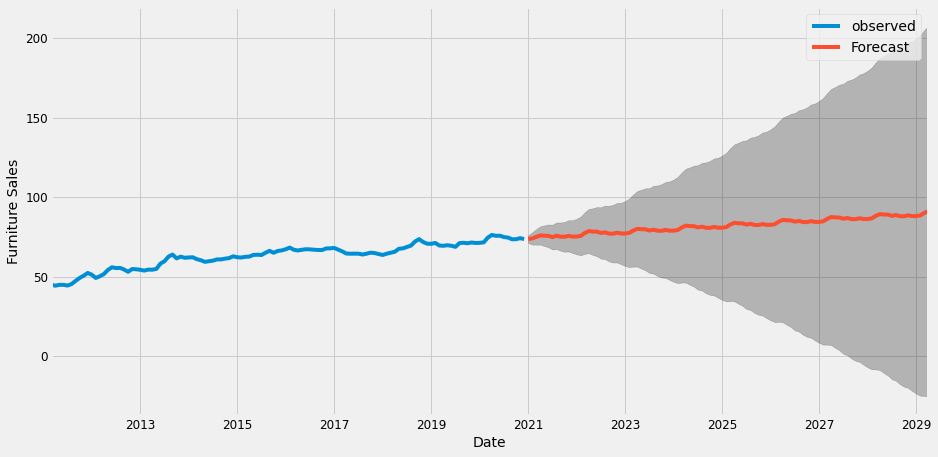

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
data.head()

,date,y
0,2011-03-01,45.200
1,2011-03-02,44.846
2,2011-03-03,44.800
3,2011-03-04,44.900
4,2011-03-05,44.906


In [ ]:
data2=data[["date","y"]]

In [ ]:
# APPLYING FB PROPHET METHOD, U try this 

from fbprophet import Prophet
data2.rename(columns={'Year_Value': 'y', 'date':'ds'}, inplace = True)
data2.head().iloc[:,:2]


,ds,y
0,2011-03-01,45.200
1,2011-03-02,44.846
2,2011-03-03,44.800
3,2011-03-04,44.900
4,2011-03-05,44.906


In [ ]:
m1 = Prophet(daily_seasonality=True)
m1.fit(data2)

In [ ]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,3649,3650,3651,3652,3653
ds,2021-02-25 00:00:00,2021-02-26 00:00:00,2021-02-27 00:00:00,2021-02-28 00:00:00,2021-03-01 00:00:00
trend,75.7916,75.7994,75.8071,75.8149,75.8227
yhat_lower,74.1838,74.1966,74.1812,74.1498,74.2663
yhat_upper,77.0593,77.0663,77.0496,77.0581,77.133
trend_lower,75.5635,75.5618,75.5602,75.5586,75.5569
trend_upper,75.9224,75.9366,75.9507,75.9648,75.979
additive_terms,-0.162835,-0.157285,-0.177428,-0.188601,-0.173782
additive_terms_lower,-0.162835,-0.157285,-0.177428,-0.188601,-0.173782
additive_terms_upper,-0.162835,-0.157285,-0.177428,-0.188601,-0.173782
daily,-0.198509,-0.198509,-0.198509,-0.198509,-0.198509


In [ ]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3649,2021-02-25,75.628784,74.183783,77.059265
3650,2021-02-26,75.642094,74.196619,77.066286
3651,2021-02-27,75.629711,74.181183,77.049648
3652,2021-02-28,75.626299,74.149840,77.058071
3653,2021-03-01,75.648878,74.266299,77.133011


In [ ]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
3649,7.001054e+32,1.800548e+32,2.936249e+33
3650,7.094865e+32,1.674550e+32,3.179306e+33
3651,7.007552e+32,1.694201e+32,2.884758e+33
3652,6.983680e+32,1.560605e+32,3.052262e+33
3653,7.143158e+32,1.617994e+32,2.845414e+33


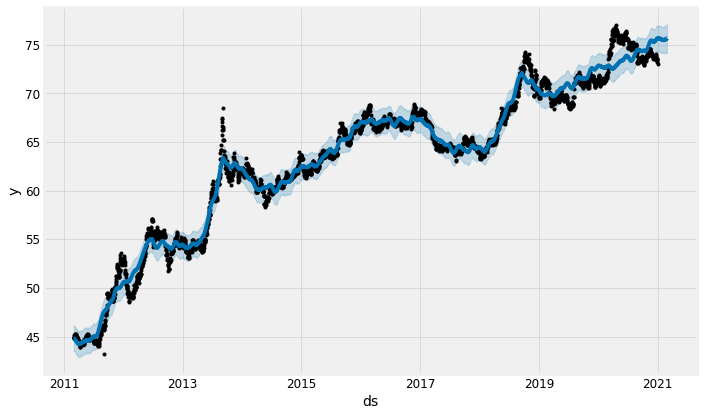

In [ ]:
m1.plot(forecast1);

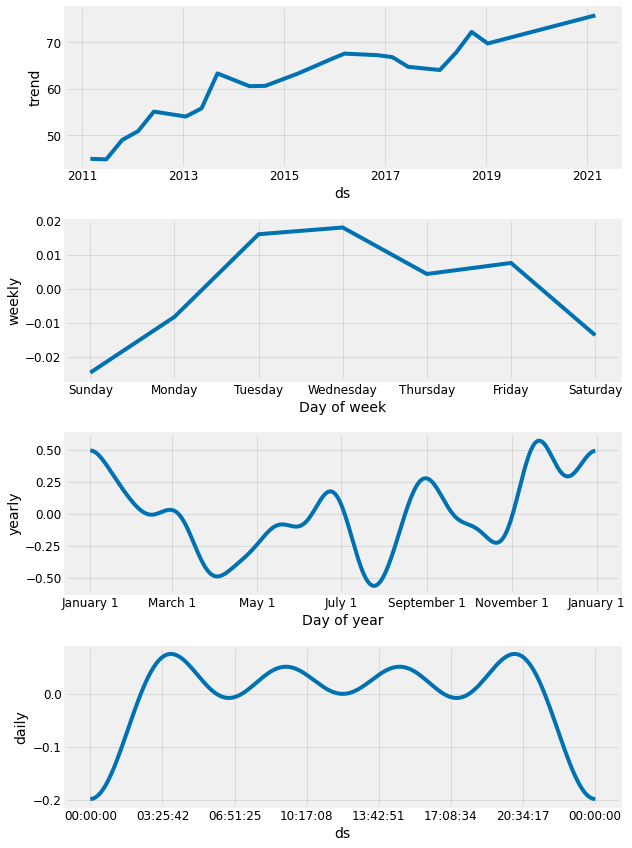

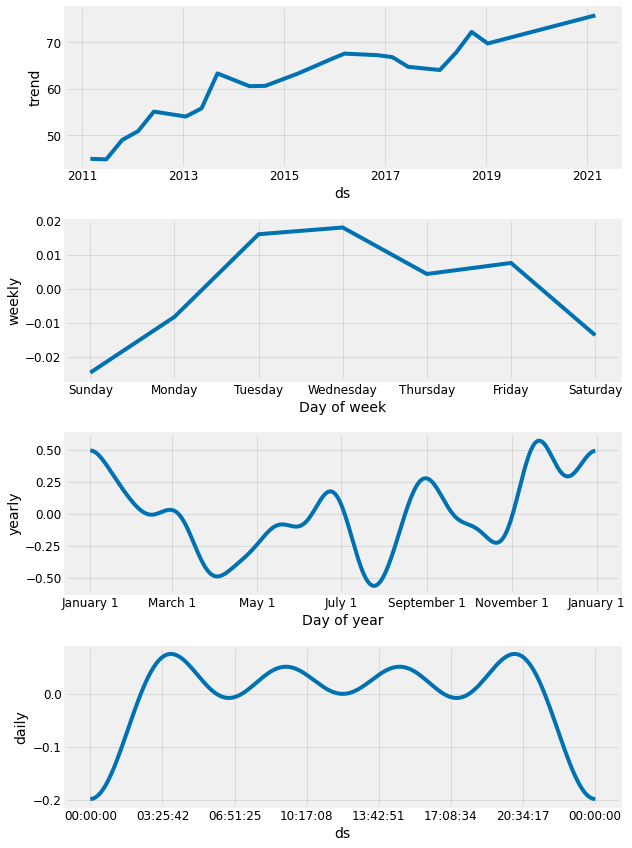

In [ ]:
m1.plot_components(forecast1)